In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import anndata as ad
import scipy as sp
from numpy.random import default_rng

In [2]:
adata = sq.read.visium(f'../../data/reference_data/32_10x_Xenium_Human_Colon_Cancer')

In [3]:
adata

AnnData object with n_obs × n_vars = 6518 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [5]:
adata.layers['counts'] = adata.X.copy()

In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

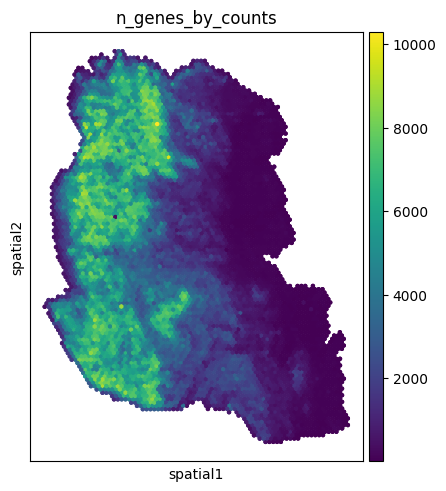

In [7]:
sq.pl.spatial_scatter(adata, color=['n_genes_by_counts'], shape=None)

In [8]:
sc.pp.filter_genes(adata, min_cells=2000)

In [9]:
adata

AnnData object with n_obs × n_vars = 6518 × 3093
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'
    layers: 'counts'

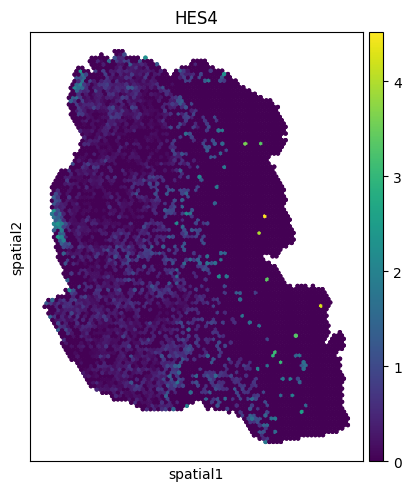

In [10]:
sq.pl.spatial_scatter(adata, color=['HES4'], shape=None)

In [11]:
rng = default_rng(0)
idx_shuffle = rng.permutation(adata.layers['counts'].shape[0])
adata.layers['counts'] = adata.layers['counts'][idx_shuffle, :]
adata.X = adata.X[idx_shuffle, :]

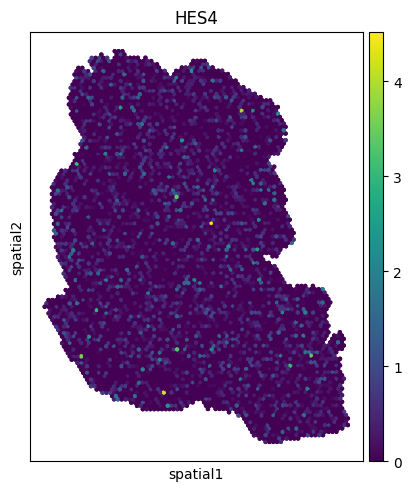

In [12]:
sq.pl.spatial_scatter(adata, color=['HES4'], shape=None)

In [13]:
adata.write_h5ad('../../results/04_statistical_calibration/32_10x_Xenium_Human_Colon_Cancer.h5ad')